author: Songyang Cheng
date: 0922

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Relationship Across Time betwee Traffic Light Cycle and Pedestrain Volume 

FIXME: technical issue

In [2]:
programs = pd.read_excel('te_cycle_data.xlsx', sheet_name='Programs')
programs.head()

,Intersection,Day Type,Start Time,Pattern
0,State and Dayton,Monday - Thursday,00:30:00,Flash
1,State and Dayton,Monday - Thursday,06:00:00,6
2,State and Dayton,Monday - Thursday,07:00:00,3
3,State and Dayton,Monday - Thursday,09:10:00,1
4,State and Dayton,Monday - Thursday,15:30:00,5


In [3]:
patterns = pd.read_excel('te_cycle_data.xlsx', sheet_name='Patterns')
patterns.head()

,Intersection,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,1,Dayton/Fairchild,State,30,65,35,1.5,3.0,30.5,4.5,7,23.5,30,1.5,3.0,25.5,4.5,12,13.5
1,State and Dayton,3,Dayton/Fairchild,State,6,80,50,1.5,3.0,45.5,4.5,7,38.5,30,1.5,3.0,25.5,4.5,12,13.5
2,State and Dayton,5,Dayton/Fairchild,State,21,80,50,1.5,3.0,45.5,4.5,7,38.5,30,1.5,3.0,25.5,4.5,12,13.5
3,State and Dayton,6,Dayton/Fairchild,State,32,65,35,1.5,3.0,30.5,4.5,7,23.5,30,1.5,3.0,25.5,4.5,12,13.5
4,State and Gorham,1,Gorham,State,29,80,53,1.5,3.5,48.0,5.0,9,39.0,27,2.5,3.0,21.5,5.5,11,10.5


In [4]:
programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
Intersection    96 non-null object
Day Type        96 non-null object
Start Time      96 non-null object
Pattern         96 non-null object
dtypes: object(4)
memory usage: 3.1+ KB


In [5]:
patterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 20 columns):
Intersection                             17 non-null object
Pattern                                  17 non-null int64
Main Street                              17 non-null object
Cross Street                             17 non-null object
Cycle Offset (s)                         17 non-null int64
Total Cycle Time (s)                     17 non-null int64
Main Street Total Cycle Time (s)         17 non-null int64
Main Street Red (s)                      17 non-null float64
Main Street Yellow (s)                   17 non-null float64
Main Street Green (s)                    17 non-null float64
Main Street Do Not Walk (s)              17 non-null float64
Main Street Flashing Do Not Walk (s)     17 non-null int64
Main Street Walk (s)                     17 non-null float64
Cross Street Total Cycle Time (s)        17 non-null int64
Cross Street Red (s)                     17 non-null float

Want to combine this two dataframe based on the same columns (Pattern,Intersection). However, it turns out that the type does not match. 
Solution here is to replace 'Flash' in the programs dataframe with 0 and convert the type to int. 

In [6]:
programs['Pattern'] = programs['Pattern'].replace('Flash', 0)
programs['Pattern'].astype('int64')
programs['Pattern'].head()

0    0
1    6
2    3
3    1
4    5
Name: Pattern, dtype: int64

In [7]:
combined = pd.merge(programs, patterns, on=['Intersection', 'Pattern'], how="left")
combined

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
5,State and Dayton,Monday - Thursday,18:00:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
6,State and Dayton,Monday - Thursday,19:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
7,State and Dayton,Friday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,State and Dayton,Friday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
9,State and Dayton,Friday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [8]:
Dayton = combined[combined['Intersection'] == 'State and Dayton']
Gorham = combined[combined['Intersection'] == 'State and Gorham']
Johnson = combined[combined['Intersection'] == 'State and Johnson']

In [9]:
Dayton

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
5,State and Dayton,Monday - Thursday,18:00:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
6,State and Dayton,Monday - Thursday,19:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
7,State and Dayton,Friday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,State and Dayton,Friday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
9,State and Dayton,Friday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [10]:
Dayton['Start Time'].count(), Dayton['Main Street'].count()

(24, 21)

In [11]:
Dayton_weekday = Dayton[Dayton['Day Type'] == 'Monday - Thursday']
Dayton_fri = Dayton[Dayton['Day Type'] == 'Friday']
Dayton_sat = Dayton[Dayton['Day Type'] == 'Saturday']
Dayton_sun = Dayton[Dayton['Day Type'] == 'Sunday']
Dayton_weekday.head()

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [12]:
Dayton_weekday.dtypes

Intersection                              object
Day Type                                  object
Start Time                                object
Pattern                                    int64
Main Street                               object
Cross Street                              object
Cycle Offset (s)                         float64
Total Cycle Time (s)                     float64
Main Street Total Cycle Time (s)         float64
Main Street Red (s)                      float64
Main Street Yellow (s)                   float64
Main Street Green (s)                    float64
Main Street Do Not Walk (s)              float64
Main Street Flashing Do Not Walk (s)     float64
Main Street Walk (s)                     float64
Cross Street Total Cycle Time (s)        float64
Cross Street Red (s)                     float64
Cross Street Yellow (s)                  float64
Cross Street Green (s)                   float64
Cross Street Do Not Walk (s)             float64
Cross Street Flashin

In [13]:
type(Dayton_weekday['Start Time'][0])

datetime.time

In [14]:
import datetime
import matplotlib.dates as mdates

## Green Lights Cycle

In [22]:
Dayton_weekday["Start Time"]

0    00:30:00
1    06:00:00
2    07:00:00
3    09:10:00
4    15:30:00
5    18:00:00
6    19:00:00
Name: Start Time, dtype: object

In [19]:
time_format = '%H:%M:%S'
Dayton_weekday_time = [datetime.datetime.strptime(str(i), time_format) for i in Dayton_weekday['Start Time']]
Dayton_weekday_time

[datetime.datetime(1900, 1, 1, 0, 30),
 datetime.datetime(1900, 1, 1, 6, 0),
 datetime.datetime(1900, 1, 1, 7, 0),
 datetime.datetime(1900, 1, 1, 9, 10),
 datetime.datetime(1900, 1, 1, 15, 30),
 datetime.datetime(1900, 1, 1, 18, 0),
 datetime.datetime(1900, 1, 1, 19, 0)]

In [28]:
Dayton_weekday['Main Street Green (s)']

0     NaN
1    30.5
2    45.5
3    30.5
4    45.5
5    30.5
6    30.5
Name: Main Street Green (s), dtype: float64

Text(0, 0.5, 'Time for Green (sec)')

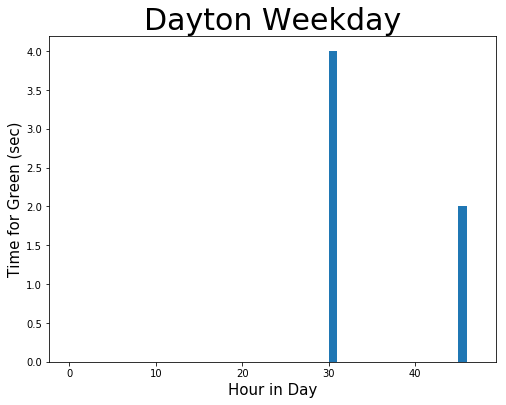

In [63]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
ax = plt.subplot(111)
num_bins = 48
ax.hist(Dayton_weekday['Main Street Green (s)'], range(48))
# # ax.hist(Dayton_weekday["Start Time"], Dayton_weekday['Main Street Green (s)'], color = 'blue', label="main street")
# #set ticks every half an hour
# ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,48))) 
# #set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.set_xlim(["00:00", "23:59"])
# ax.set_ylim(bottom=0)
# ax.set_xticklabels(labels=Dayton_weekday_time, rotation=90)
# plt.bar(Dayton_weekday['Start Time'], Dayton_weekday['Cross Street Green (s)'], bottom=Dayton_weekday['Main Street Green (s)'],
#         color = 'green', label="cross street")
# plt.legend(loc=[1.05, 0.8])
ax.set_title("Dayton Weekday", fontsize=30)
ax.set_xlabel("Hour in Day", fontsize=15)
ax.set_ylabel("Time for Green (sec)", fontsize=15)

In [ ]:
## TODO 

## difference between Green Lights

In [51]:
def bar_(x, y, color="black", title="", xlabel="xlabel", ylabel="ylabel"):
    ax1 = sns.barplot(x = x, y = y, color = color)
    ax1.set_title(title, fontsize=50)
    ax1.set_xlabel(xlabel, fontsize=40)
    ax1.set_xticklabels(labels = x, rotation = 90)
    ax1.set_ylabel(ylabel, fontsize=40)
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    
    return 

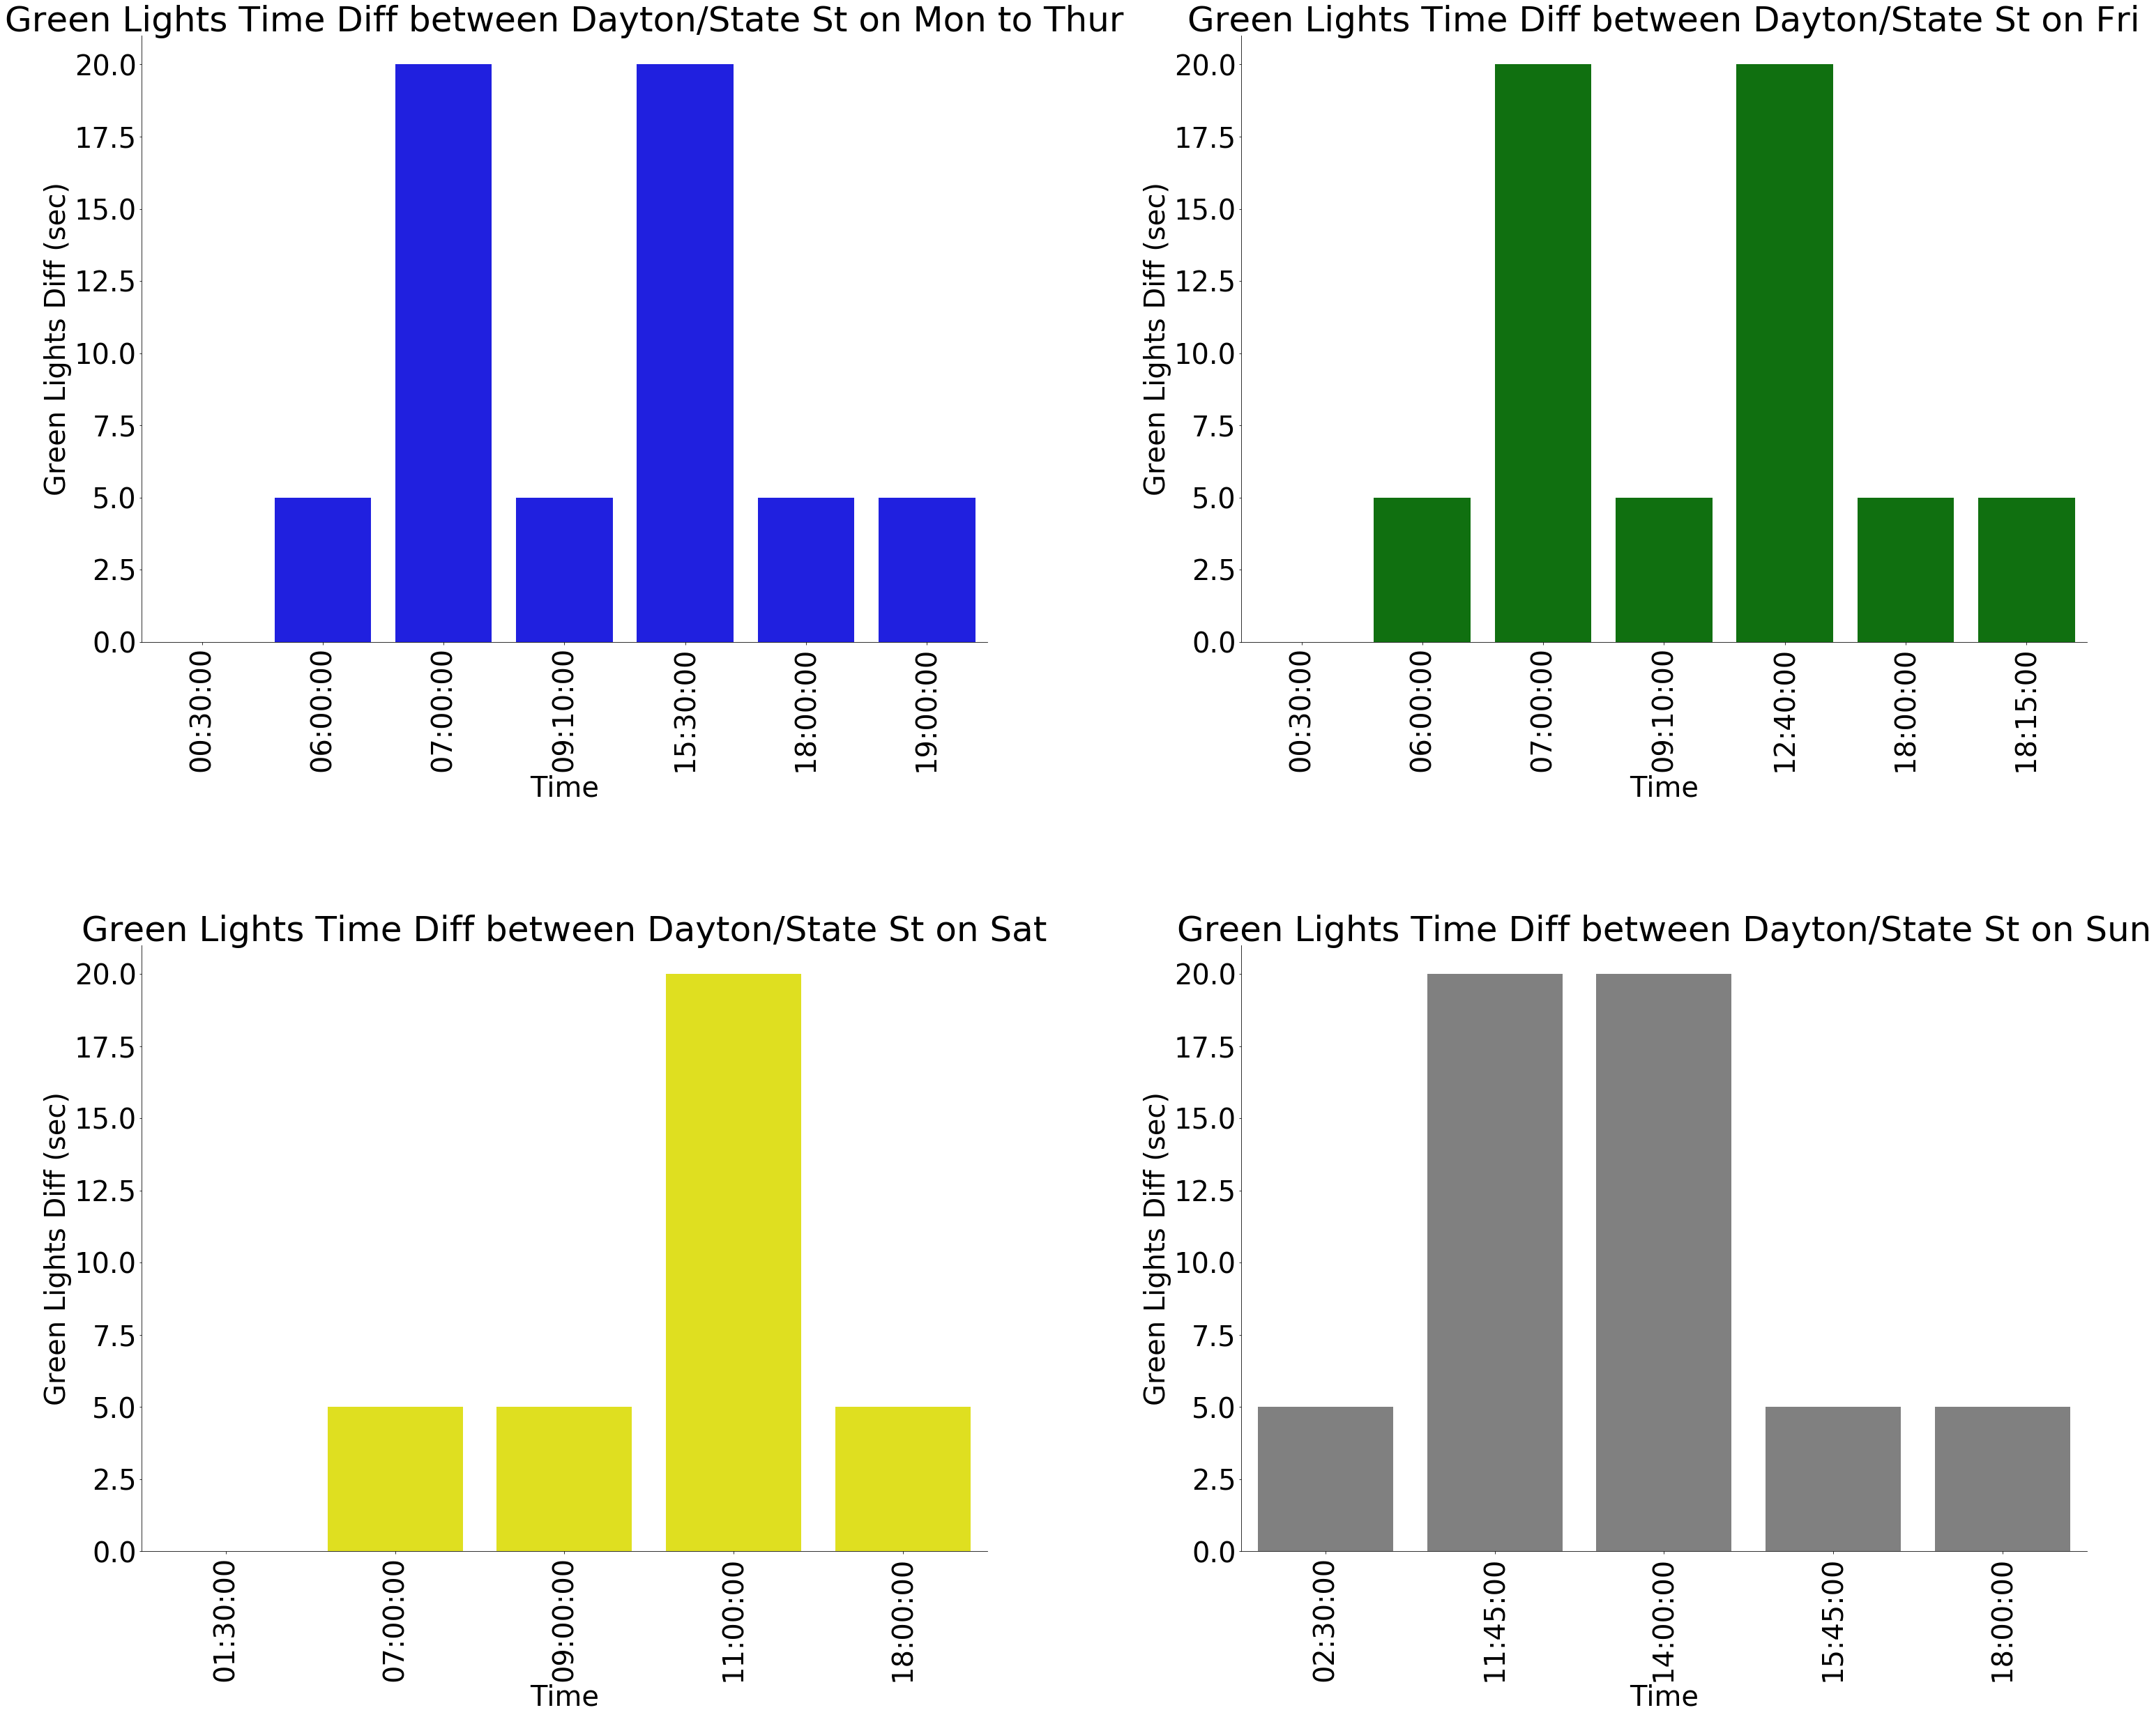

In [55]:
plt.rcParams['figure.figsize'] = (50.0, 40.0)
plt.subplots_adjust(wspace=0.3, hspace=0.5)#调整子图间

plt.subplot(221)  # the first plot
bar_(Dayton_weekday["Start Time"], (Dayton_weekday['Main Street Green (s)'] - Dayton_weekday['Cross Street Green (s)']), "blue", 
     "Green Lights Time Diff between Dayton/State St on Mon to Thur", "Time", "Green Lights Diff (sec)")

plt.subplot(222)  # the second plot
bar_(Dayton_fri["Start Time"], (Dayton_fri['Main Street Green (s)'] - Dayton_fri['Cross Street Green (s)']), "green", 
     "Green Lights Time Diff between Dayton/State St on Fri", "Time", "Green Lights Diff (sec)")

plt.subplot(223)  # the third plot
bar_(Dayton_sat["Start Time"], (Dayton_sat['Main Street Green (s)'] - Dayton_sat['Cross Street Green (s)']), "yellow", 
     "Green Lights Time Diff between Dayton/State St on Sat", "Time", "Green Lights Diff (sec)")

plt.subplot(224)  # the fourth plot
bar_(Dayton_sun["Start Time"], (Dayton_sun['Main Street Green (s)'] - Dayton_sun['Cross Street Green (s)']), "gray", 
     "Green Lights Time Diff between Dayton/State St on Sun", "Time", "Green Lights Diff (sec)")
None

The plots themselves can be a little bit misleading, as I do not find out a better way to manage the x-axis. I will fix the issue as soon as 
I find out the solution. 
My takeaway here:
On Mon-Thur, the traffic are more busy along the Dayton St from 7 to 9 am, and from 3:30 to 6 pm
On Fri, the traffic are more busy along the Dayton St from 7 to 9 am, and from 12:40 to 6 pm
On Sat, the traffic are more busy along the Dayton St from 11 am to 6 pm
On Sun, the traffic are more busy along the Dayton St from 11:45 am to 2 pm 

## Pedestrian Count Distribution on Weekday/Weekends

In [9]:
pedestrian = pd.read_csv('Upper_State_St._Pedestrian_Counts.csv')
pedestrian.head(2)

,Time,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId
0,20-08-2018 08:00:00,80,113,82,115,115.0,76.0,1
1,24-08-2018 12:00:00,446,350,445,0,517.0,502.0,2


In [3]:
from time import time,localtime,strftime
import datetime

In [10]:
names = pedestrian.Time.str.split(' ',expand=True)
names.columns = ['date', 'Hour']
pedestrian = pedestrian.join(names)
pedestrian

,Time,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,Hour
0,20-08-2018 08:00:00,80,113,82,115,115.0,76.0,1,20-08-2018,08:00:00
1,24-08-2018 12:00:00,446,350,445,0,517.0,502.0,2,24-08-2018,12:00:00
2,20-08-2018 09:00:00,129,108,117,111,105.0,122.0,3,20-08-2018,09:00:00
3,24-08-2018 13:00:00,391,248,370,0,450.0,481.0,4,24-08-2018,13:00:00
4,24-08-2018 14:00:00,335,212,281,0,337.0,416.0,5,24-08-2018,14:00:00
5,20-08-2018 10:00:00,187,137,168,140,156.0,180.0,6,20-08-2018,10:00:00
6,20-08-2018 11:00:00,291,232,235,178,298.0,332.0,7,20-08-2018,11:00:00
7,24-08-2018 15:00:00,260,194,232,0,351.0,360.0,8,24-08-2018,15:00:00
8,24-08-2018 16:00:00,267,244,268,0,364.0,407.0,9,24-08-2018,16:00:00
9,20-08-2018 12:00:00,408,297,371,245,425.0,453.0,10,20-08-2018,12:00:00


In [12]:
pedestrian["date"] = pd.to_datetime(pedestrian["date"])
pedestrian["day_of_week"] = pedestrian["date"].dt.weekday_name
pedestrian["day_of_week"].value_counts()

Monday       1272
Friday       1272
Sunday       1248
Wednesday    1248
Tuesday      1248
Thursday     1247
Saturday     1224
Name: day_of_week, dtype: int64

In [13]:
pedestrian.head()

,Time,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,Hour,day_of_week
0,20-08-2018 08:00:00,80,113,82,115,115.0,76.0,1,2018-08-20,08:00:00,Monday
1,24-08-2018 12:00:00,446,350,445,0,517.0,502.0,2,2018-08-24,12:00:00,Friday
2,20-08-2018 09:00:00,129,108,117,111,105.0,122.0,3,2018-08-20,09:00:00,Monday
3,24-08-2018 13:00:00,391,248,370,0,450.0,481.0,4,2018-08-24,13:00:00,Friday
4,24-08-2018 14:00:00,335,212,281,0,337.0,416.0,5,2018-08-24,14:00:00,Friday


In [17]:
ped_wkd = pedestrian[(pedestrian['day_of_week'] == 'Monday')|
                     (pedestrian['day_of_week'] == 'Tuesday')|
                     (pedestrian['day_of_week'] == 'Wednesday')|
                     (pedestrian['day_of_week'] == 'Thursday') ]
ped_wkd.head()

,Time,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,Hour,day_of_week
0,20-08-2018 08:00:00,80,113,82,115,115.0,76.0,1,2018-08-20,08:00:00,Monday
2,20-08-2018 09:00:00,129,108,117,111,105.0,122.0,3,2018-08-20,09:00:00,Monday
5,20-08-2018 10:00:00,187,137,168,140,156.0,180.0,6,2018-08-20,10:00:00,Monday
6,20-08-2018 11:00:00,291,232,235,178,298.0,332.0,7,2018-08-20,11:00:00,Monday
9,20-08-2018 12:00:00,408,297,371,245,425.0,453.0,10,2018-08-20,12:00:00,Monday


In [22]:
ped_fri = pedestrian[(pedestrian['day_of_week'] == 'Friday')]
ped_sat = pedestrian[(pedestrian['day_of_week'] == 'Saturday')]
ped_sun = pedestrian[(pedestrian['day_of_week'] == 'Sunday')]

In [59]:
def box_plot(df, col_num, title, xlab, ylab, ylim = (0,2000)):
    ax = plt.subplots()[1]
    for i in range(col_num): 
        col = df.columns[i]
        x = i + 1
        y = df[col].quantile(0.5)
        ax.plot(x, y, 'ro')

        # 0.75 to 1 
        y1 = df[col].quantile(0.75)
        y2 = df[col].quantile(1)
        ax.plot((x,x), (y1,y2), 'k')

        # 0.25 to 0 
        y1 = df[col].quantile(0.25)
        y2 = df[col].quantile(0)
        ax.plot((x,x), (y1,y2), 'k')

    ax.set_title(title)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels([])
    ax.set_xticks(range(1, len(df.columns)+1))
    ax.set_xlim(0.5, len(df.columns)+0.5)
    ax.set_ylim(ylim)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
    return ax

In [62]:
def column_concat_df(wkd, fri, sat, sun, col_name):
    df = pd.concat([wkd[col_name].reset_index(drop=True), 
                    fri[col_name].reset_index(drop=True),
                    sat[col_name].reset_index(drop=True),
                    sun[col_name].reset_index(drop=True)], 
                     axis=1)
    df.columns = ["Weekday", "Friday", "Saturday", "Sunday"]
    return df

In [63]:
State_22 = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "SS_22_State_St__North_Side")
State_22.head()

,Weekday,Friday,Saturday,Sunday
0,80,446.0,337.0,528.0
1,129,391.0,233.0,383.0
2,187,335.0,192.0,333.0
3,291,260.0,35.0,67.0
4,408,267.0,7.0,12.0


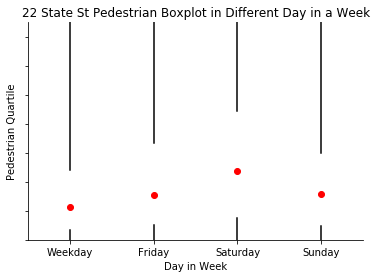

In [60]:
box_plot(State_22, 4, "22 State St Pedestrian Boxplot in Different Day in a Week", "Day in Week", "Pedestrian Quartile", (0,750))

In [66]:
State_23 = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "SS_23_State_St__South_Side")
State_23.head()

,Weekday,Friday,Saturday,Sunday
0,113,350.0,308.0,429.0
1,108,248.0,166.0,261.0
2,137,212.0,96.0,151.0
3,232,194.0,27.0,20.0
4,297,244.0,9.0,13.0


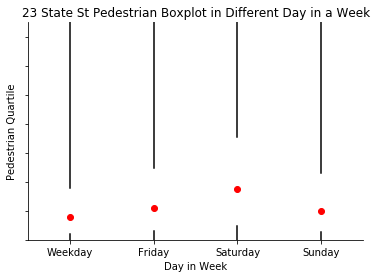

In [67]:
box_plot(State_23, 4, "23 State St Pedestrian Boxplot in Different Day in a Week", "Day in Week", "Pedestrian Quartile", (0,750))

In [68]:
Goodman = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "F200_State_St____Goodman_s")
Goodman.head()

,Weekday,Friday,Saturday,Sunday
0,82,445.0,255.0,414.0
1,117,370.0,160.0,277.0
2,168,281.0,103.0,218.0
3,235,232.0,26.0,30.0
4,371,268.0,7.0,9.0


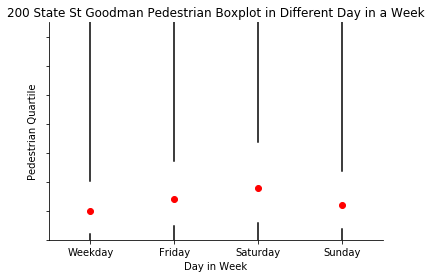

In [69]:
box_plot(Goodman, 4, "200 State St Goodman Pedestrian Boxplot in Different Day in a Week", "Day in Week", "Pedestrian Quartile", (0,750))

In [70]:
art_center = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "F200_State_St____Art_Center")
art_center.head()

,Weekday,Friday,Saturday,Sunday
0,115,0.0,0.0,0.0
1,111,0.0,0.0,0.0
2,140,0.0,0.0,0.0
3,178,0.0,0.0,0.0
4,245,0.0,0.0,0.0


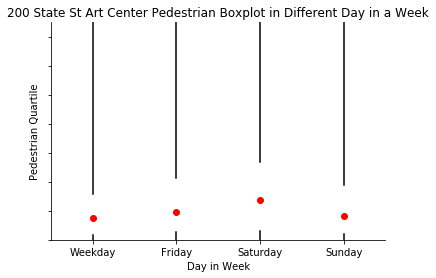

In [71]:
box_plot(art_center, 4, "200 State St Art Center Pedestrian Boxplot in Different Day in a Week", "Day in Week", "Pedestrian Quartile", (0,750))

Group by different day in a week, the volume of Pedestrian does not vary too much, because we can see the 3rd quantile is not too much far away from 1st quantile.

Also, it seems that Friday has roughly the same pattern as Sunday. We can consider use the same traffic light cycle pattern on Friday and Sunday. 